<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Mini Project - CT2 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='green'>  CT2 Project </font> 

### Apply **DBSCAN Clustering** for the **Country Status DataSet**.

#### It contains the following data fields: country, child_mort, exports, health,	imports, income,	inflation,	life_expec,	total_fer,	gdpp

### Define the Required Libraries for this problem. **(2 marks)**

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

### Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [123]:
df = pd.read_csv(r"C:\Users\priya\SRM PYTHON\ML-unsupervised\MP2\Country-data.csv")
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [124]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


###  INFERENCE:   <font color='blue'> The above statistics shows that the features have values in different ranges and we need to scale the data before clustering. As clustering depends on the distance between data points to determine clusters. If the data is not scaled, features with larger values, will dominate the distance calculations. Having some features dominate the distance calculations can cause bias and lead to incorrect clustering results.</font>
    
### <font color='green'> It is recommended to normalize data so that all features have similar scaling. It ensures that all features contribute equally to the distance calculations and improve clustering performance. And also from count we can understand that there is no null values in the given datatset.</font>
 

In [125]:
df.drop(columns='country',inplace= True)

### Print the correlation map and find the most related features. **(1 mark)**

<AxesSubplot:>

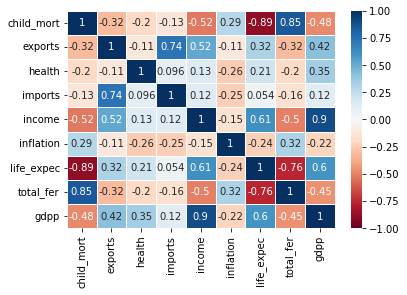

In [126]:
sns.heatmap(df.corr(),annot = True,linewidths=.5,cmap='RdBu',vmin=-1,vmax=1)

In [127]:
# Convert the correlation matrix into a DataFrame
corr_df = pd.DataFrame(df.corr())

# Set the correlation threshold
threshold = 0.6  
correlated_values = []

for i in range(len(corr_df.columns)):
    for j in range(i + 1, len(corr_df.columns)):
        if abs(corr_df.iloc[i, j]) > threshold:
            correlated_values.append((corr_df.columns[i], corr_df.columns[j], corr_df.iloc[i, j]))

# Sort correlation value in desc order
correlated_values.sort(key=lambda x: abs(x[2]), reverse=True)

for val in correlated_values:
    print(f"{val[0]} and {val[1]}: {val[2]}")

income and gdpp: 0.8955714330875322
child_mort and life_expec: -0.8866760973367757
child_mort and total_fer: 0.8484781105566703
life_expec and total_fer: -0.7608746874349642
exports and imports: 0.7373808339554998
income and life_expec: 0.6119624680973177
life_expec and gdpp: 0.6000891345742055


###  INFERENCE:   <font color='blue'> From the above cell, we can see feature 'income' and 'gdpp' has high correlation with each other with correlation value = 0.8955 (0.90) . They are followed by 'child_mort' and 'total_fer' with correlation value = 0.848. </font>


### Plot a graph with the correlated features. **(1 mark)**

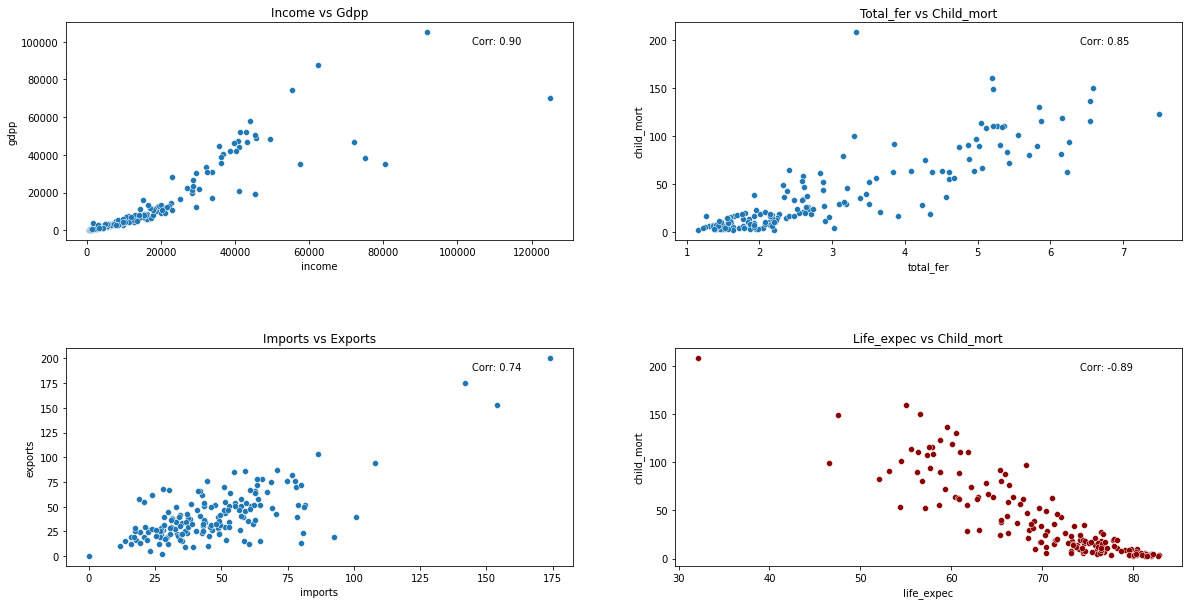

In [128]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

sns.scatterplot(x=df['income'], y=df['gdpp'],legend='auto', ax=axes[0][0])
axes[0, 0].set_title('Income vs Gdpp')
corr2 = np.corrcoef(df['income'],df['gdpp'])[0, 1]
axes[0, 0].annotate(f'Corr: {corr2:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')

sns.scatterplot(x=df['total_fer'], y=df['child_mort'],legend='auto', ax=axes[0][1])
axes[0, 1].set_title('Total_fer vs Child_mort')
corr3 = np.corrcoef(df['total_fer'],df['child_mort'])[0, 1]
axes[0, 1].annotate(f'Corr: {corr3:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')

sns.scatterplot(x=df['imports'],y=df['exports'],legend='auto', ax=axes[1][0])
axes[1, 0].set_title('Imports vs Exports')
corr1 = np.corrcoef(df['imports'], df['exports'])[0, 1]
axes[1, 0].annotate(f'Corr: {corr1:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')

sns.scatterplot(x=df['life_expec'],y=df['child_mort'],legend='auto',color="darkred", ax=axes[1][1])
plt.title('Life_expec vs Child_mort')
corr4 = np.corrcoef(df['life_expec'],df['child_mort'])[0, 1]
axes[1, 1].annotate(f'Corr: {corr4:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')
plt.show()

###  INFERENCE:   <font color='blue'> Above scatter plots shows distribution of datapoints for 'Income vs Gdpp' that has 0.90 correlation value, 'Total_fer vs Child_mort' with 0.85 correlation, 'Imports vs Exports' with 0.74 correlation and 'Life_expec vs Child_mort' with a negative correlation value of -0.89  </font>

### <font color='blue'> All blue highlighted scatter plots show positive correlation where as 'Life_expec vs Child_mort' shows high negative correlation with value -0.89, i.e., with increase in child mortality, life expectancy decreases.  </font>

### Plot Elbow curve **(1 mark)**

In [129]:
# Analyzing numerical variables
num_c = df.select_dtypes(include=np.number).columns.tolist()
print("Number of numeric var:" ,len(num_c))
print(num_c)

Number of numeric var: 9
['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


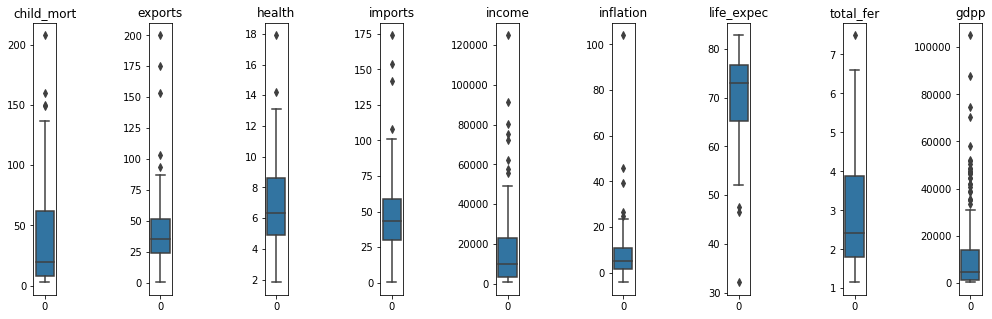

In [130]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=4, hspace=5)
for i in range(0,len(num_c)):
    plt.subplot(1,9,i+1)
    sns.boxplot(df[num_sc[i]])
    plt.title(num_c[i])

###  INFERENCE:   <font color='green'> Data contains outliers in all features. Let us use Standard Scaler because of the following reasons:</font>

### <font color='blue'>StandardScaler transforms the data to mean of 0 and a standard deviation of 1. It is less affected by outliers because it uses the mean and standard deviation, which are not heavily influenced by extreme values.The scaling is based on z-scores, allowing the data to retain its distribution shape.StandardScaler is often recommended for algorithms that assume normally distributed data, as it maintains the shape and properties of the distribution.</font>

In [131]:
# Apply Elbow Method to find optimal clusters
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_k = scaler.fit_transform(df)
df_scaled_k

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [132]:
# Calculate the sum of squared distances (WCSS) for different values of k
from sklearn.cluster import KMeans
k_range = range(1, 10) 
WCSS = []
for i in k_range:
    clusters = KMeans(i)
    clusters.fit(df_scaled_k)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    WCSS.append( clusters.inertia_ )

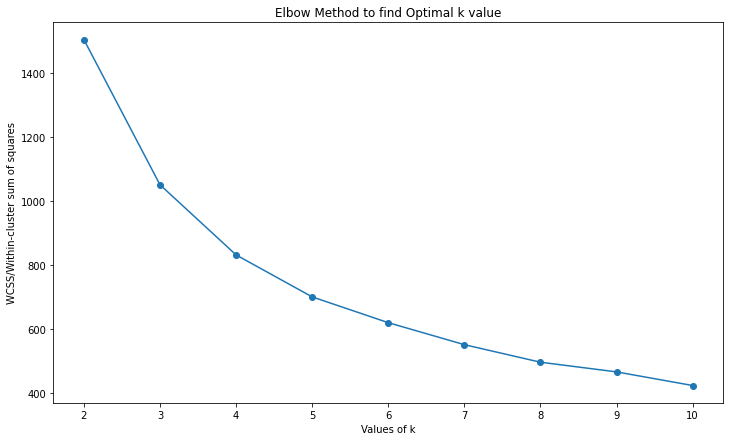

In [148]:
plt.figure(figsize=(12,7))
plt.plot(k_range,WCSS,'o-')
plt.xlabel('Values of k') 
plt.ylabel('WCSS/Within-cluster sum of squares') 
plt.title('Elbow Method to find Optimal k value')
plt.show()

###  INFERENCE:  <font color='blue'>By analyzing elbow plot, we can understand that the point of inflection is at k=4, where the SSE starts to level off. This point represents the optimal k value.

### <font color='blue'>The elbow plot shows the relationship between the number of clusters (k) and the sum of squared distances within each cluster (SSE). The optimal k value is typically found at the "elbow" of the plot, where the SSE decreases less rapidly as k increases.</font>

In [134]:
print("KMeans cluster labels:\n",labels)
print("KMeans cluster centroids:\n",centroids)

KMeans cluster labels:
 [4 7 1 4 7 1 7 5 5 1 7 2 1 7 7 2 7 4 7 1 7 0 7 8 7 4 0 7 4 5 7 4 4 7 1 7 4
 4 4 7 4 7 2 2 5 7 7 1 7 4 4 2 7 5 5 1 4 7 5 4 5 7 7 4 4 7 0 2 5 1 1 1 1 2
 5 5 7 5 7 1 4 0 8 7 4 7 7 0 0 1 2 3 7 4 4 2 2 4 3 4 7 0 7 1 7 7 4 1 0 1 5
 5 4 6 5 8 4 2 7 1 1 7 5 8 7 1 0 7 1 4 7 2 0 3 2 2 0 0 2 5 1 7 4 7 5 5 1 4
 2 4 0 7 7 7 1 4 7 8 5 5 7 1 7 1 2 1 4]
KMeans cluster centroids:
 [[ 1.14785643e+00 -4.97052785e-01  1.18325566e+00  6.09428979e-01
  -6.92966419e-01 -1.59435683e-01 -1.59653523e+00  7.53094211e-01
  -5.90313151e-01]
 [-1.01962023e-01 -2.93470503e-01 -7.76330297e-01 -7.37564393e-01
  -2.63449970e-01  7.27493220e-01  2.00354815e-02 -1.39996190e-01
  -4.22719796e-01]
 [-7.34403100e-01  1.17356729e+00  2.82087647e-02  9.70602628e-01
   4.11423331e-01 -5.12343976e-01  7.06248738e-01 -7.69553520e-01
   2.80857296e-01]
 [-8.49003244e-01  4.93567278e+00 -8.16303241e-03  4.54805768e+00
   2.43954240e+00 -5.04206141e-01  1.22682431e+00 -1.03886271e+00
   2.44079735e+00]
 [ 1.

For n_clusters = 2 The average silhouette_score is : 0.2873566892140671
For n_clusters = 3 The average silhouette_score is : 0.28329575683463126
For n_clusters = 4 The average silhouette_score is : 0.303676957667828
For n_clusters = 5 The average silhouette_score is : 0.2201207388855572
For n_clusters = 6 The average silhouette_score is : 0.2296292673013297
For n_clusters = 7 The average silhouette_score is : 0.2253113166593706
For n_clusters = 8 The average silhouette_score is : 0.220485541522416
For n_clusters = 9 The average silhouette_score is : 0.2136974906381471
For n_clusters = 10 The average silhouette_score is : 0.21228341643315787


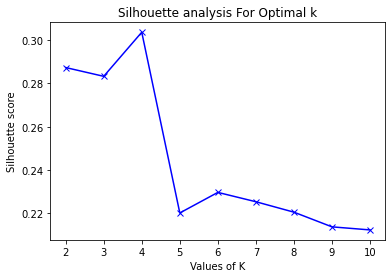

In [141]:
from sklearn.metrics import silhouette_score

k_range=[2,3,4,5,6,7,8,9,10]
sil_avg=[]
for n_clusters in k_range:
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(df_scaled_k)
        silhouette_avg = silhouette_score(df_scaled_k, cluster_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
        sil_avg.append(silhouette_score(df_scaled_k, cluster_labels)) # appending values to plot gragh

plt.plot(k_range,sil_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

###  INFERENCE:  <font color='blue'>Silhouette score is used to evaluate the quality of clustering in K-means and other clustering algorithms. It measures how well each sample in a cluster fits with its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where score = +1 indicates that the sample is well-matched to its own cluster and poorly matched to neighboring clusters.

### <font color='blue'>Using the silhouette score, we can compare different values of k in K-means clustering and select the one that yields the highest silhouette score. The higher the silhouette score, more distinct clusters are, indicating a better clustering result.Helps determining the optimal number of clusters for a given dataset.</font>

### <font color='blue'> Here the value of Silhouete score is higher for k=4 and it is the best k-value to form clusters.
    

### Apply DBSCAN to find optimal eps and minpts. **(2 marks)**

In [149]:
num_c = df.select_dtypes(include=np.number).columns.tolist()
print(num_c)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [179]:
df_cluster= df[[ 'imports', 'child_mort', 'gdpp']]

###  INFERENCE:  <font color='blue'>We have chosen one feature each from top 3 highly correlated features.</font>

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_dbscaled = scaler.fit_transform(df_cluster)

In [188]:
# Let us find optimal eps & minpts using silhouette score

from sklearn.cluster import DBSCAN

for eps in [i/10 for i in range(4,9)]:
    for min_samples in range (6,9):
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(df_dbscaled)
        score = silhouette_score(df_dbscaled, labels)
        print(f'eps {eps}',',',f' min samples {min_samples}','->',f'Silhouette Score: {score}',f'clusters labels:{np.unique(labels)}')

eps 0.4 ,  min samples 6 -> Silhouette Score: 0.31408136196259995 clusters labels:[-1  0  1  2]
eps 0.4 ,  min samples 7 -> Silhouette Score: 0.3837653921749799 clusters labels:[-1  0  1]
eps 0.4 ,  min samples 8 -> Silhouette Score: 0.23461617207878455 clusters labels:[-1  0  1  2]
eps 0.5 ,  min samples 6 -> Silhouette Score: 0.31408136196259995 clusters labels:[-1  0  1  2]
eps 0.5 ,  min samples 7 -> Silhouette Score: 0.30959911121172456 clusters labels:[-1  0  1  2]
eps 0.5 ,  min samples 8 -> Silhouette Score: 0.37072902965139154 clusters labels:[-1  0  1]
eps 0.6 ,  min samples 6 -> Silhouette Score: 0.34028357321302294 clusters labels:[-1  0  1  2]
eps 0.6 ,  min samples 7 -> Silhouette Score: 0.3354422685867429 clusters labels:[-1  0  1  2]
eps 0.6 ,  min samples 8 -> Silhouette Score: 0.3354422685867429 clusters labels:[-1  0  1  2]
eps 0.7 ,  min samples 6 -> Silhouette Score: 0.3239857615691091 clusters labels:[-1  0  1  2  3]
eps 0.7 ,  min samples 7 -> Silhouette Score: 0

###  INFERENCE:  <font color='blue'>For eps 0.4 ,  min samples 7 - silhouette score is higher with a value of 0.3837 when compared to other combinations. The cluster labels are [-1,  0 , 1] . Let us use the same value to fit DBSCAN to our dataframe.</font>

In [194]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=7)
labels = dbscan.fit_predict(df_dbscaled)
df_cluster['clustdbscan'] = labels

### Plot the DBSCAN clustered datapoints using scatter plot. **(1 mark)**

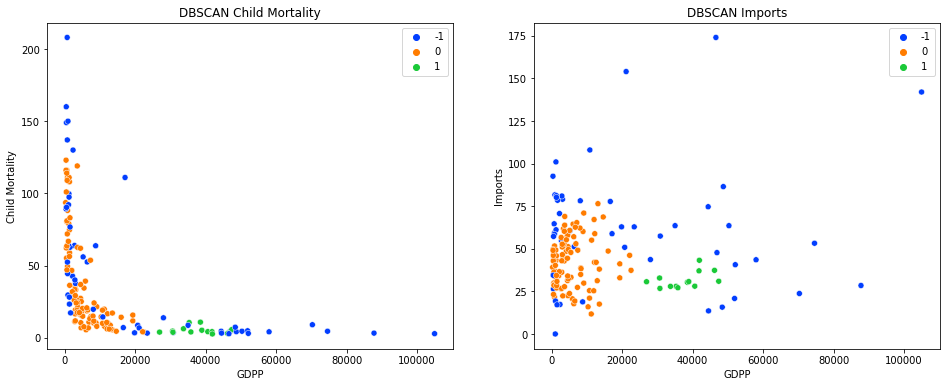

In [196]:
plt.figure(figsize = (16,6))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = df_cluster, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_cluster, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show() 

###  INFERENCE:  <font color='blue'>We have compared clusters for 2 different features - 'Child Mortality' and 'Imports' by plotting them against 'GDPP'. The datapoints highlighted in blue falls under cluster '-1' and are considered to be noise. Whereas remaining orange and green datapoints are classified into 2 different clusters - cluster '0' & cluster '1'</font>

## Apply Fuzzy C Means Clustering for the Country Status DataSet.

#### It contains the following data fields: country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

### Define the Required Libraries for this problem. **(2 marks)**

In [156]:
pip install --user fuzzy-c-means

Note: you may need to restart the kernel to use updated packages.


In [157]:
from fcmeans import FCM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [158]:
dff = pd.read_csv(r"C:\Users\priya\SRM PYTHON\ML-unsupervised\MP2\Country-data.csv")
dff.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Label encode the country field from the dataset. **(1 mark)**

In [159]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to your categorical data
label_encoder.fit(dff['country'])

# Transform the categorical data into numerical labels
dff['country'] = label_encoder.transform(dff['country'])

In [160]:
dff.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [161]:
dff['country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166])

### Print the correlation map and find the most related features. **(1 mark)**

<AxesSubplot:>

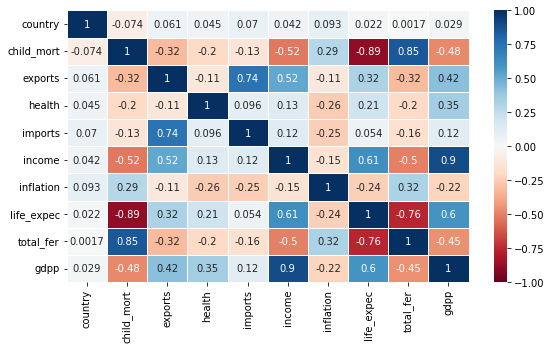

In [162]:
plt.figure(figsize=(9, 5))
sns.heatmap(dff.corr(),annot = True,linewidths=.5,cmap='RdBu',vmin=-1,vmax=1)

In [163]:
most_related_features= dff.corr()['gdpp'].abs().sort_values(ascending=False)[1:]
print("Most related features:")
print(most_related_features)

Most related features:
income        0.895571
life_expec    0.600089
child_mort    0.483032
total_fer     0.454910
exports       0.418725
health        0.345966
inflation     0.221631
imports       0.115498
country       0.029414
Name: gdpp, dtype: float64


### Scaling the dataset. **(1 mark)**

In [164]:
scaler = StandardScaler()

# Select the columns to be scaled (excluding the first column 'country')
col = dff.columns[1:]

# Apply the scaler to the selected columns
dff_scaled = dff.copy()
dff_scaled[col] = scaler.fit_transform(dff[col])

In [165]:
dff_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Apply Fuzzy C-Means Algorithm. **(2 marks)**

In [166]:
# Apply Fuzzy C-Means Algorithm
# Considering only the values as it accepts as an array and also excluding 'country' feature
df_fuzzy = dff_scaled.drop('country', axis=1).values

fcm = FCM(n_clusters=2)
fcm.fit(df_fuzzy)

In [167]:
df_fuzzy

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [168]:
fcm_centers = fcm.centers
fcm_labels  = fcm.predict(df_fuzzy)
print ("fcm_centers:")
print (fcm_centers)
print ("fcm_labels:")
print (fcm_labels)

fcm_centers:
[[ 0.72565289 -0.28819551 -0.29047447 -0.13511709 -0.49097346  0.21483351
  -0.72948686  0.77281628 -0.44991525]
 [-0.57001889  0.19820921  0.26601013  0.07662455  0.38230931 -0.25066963
   0.58938055 -0.59800166  0.36961927]]
fcm_labels:
[0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0]


### Merge the predicted label with the dataframe. **(2 marks)**

In [169]:
dff_scaled['Predicted'] = fcm_labels
dff_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted
0,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


### Plot the Fuzzy C Means clustered datapoints using scatter plot. **(1 mark)**

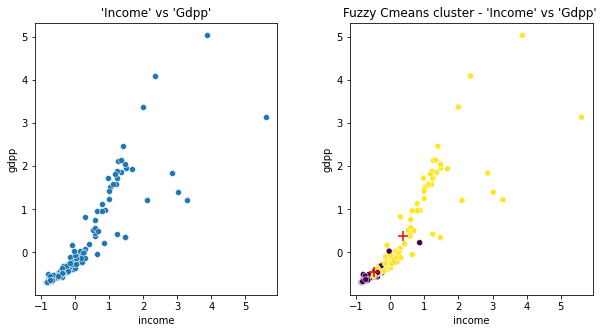

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.scatterplot(x=dff_scaled['income'], y= dff_scaled['gdpp'],legend='auto', ax=axes[0])
axes[0].set_title(" 'Income' vs 'Gdpp' ")

sns.scatterplot(x=dff_scaled['income'], y=dff_scaled['gdpp'],legend='auto', ax=axes[1],c=fcm_labels)
plt.scatter(fcm_centers[:,4], fcm_centers[:,8], marker="+", s=100, c='r')
axes[1].set_title("Fuzzy Cmeans cluster - 'Income' vs 'Gdpp' ")
plt.show()

###  INFERENCE:  <font color='blue'>Above scatterplots shows the difference on how a normal scatter plot between 'Income' vs 'Gdpp' looks and how the datapoints are segregated when they are clustered using Fuzzy cmeans clustering.</font>

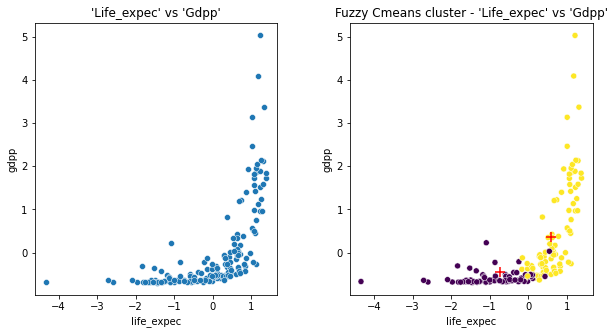

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.scatterplot(x=dff_scaled['life_expec'], y= dff_scaled['gdpp'],legend='auto', ax=axes[0])
axes[0].set_title("'Life_expec' vs 'Gdpp'")

sns.scatterplot(x=dff_scaled['life_expec'], y=dff_scaled['gdpp'],legend='auto', ax=axes[1],c=fcm_labels)
plt.scatter(fcm_centers[:,6], fcm_centers[:,8], marker="+", s=100, c='r')
axes[1].set_title("Fuzzy Cmeans cluster - 'Life_expec' vs 'Gdpp'")
plt.show()

###  INFERENCE:  <font color='blue'>Above scatterplots shows the difference on how a normal scatter plot between 'Life_expec' vs 'Gdpp' looks and how the datapoints are segregated when they are clustered using Fuzzy cmeans clustering.</font>